In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, multilabel_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('zero.csv'
)
# df = df[0].str.split(',', expand=True)
df

,0.47847703099250793,0.3531416654586792,6.055850576558441e-07,0.45093411207199097,0.4327734112739563,-0.0275229811668396,0.4439709782600403,0.5086453557014465,-0.05143608897924423,0.4398250877857208,...,0.6260523200035095,0.4223787784576416,-0.10225755721330643,0.6482440233230591,0.4599927067756653,-0.10872510820627213,0.6641089916229248,0.496867299079895,-0.11332778632640839,Gerakan 1
0,0.581686,0.025379,4.252980e-07,0.494893,0.023655,-0.013595,0.427288,0.067503,-0.025606,0.386445,...,0.583436,0.380266,-0.078033,0.574624,0.449605,-0.085615,0.569642,0.502802,-0.088329,Gerakan 1
1,0.593060,0.051495,5.244773e-07,0.507722,0.031889,-0.024907,0.436255,0.056203,-0.045139,0.384085,...,0.577404,0.385507,-0.094931,0.562100,0.453344,-0.106025,0.550208,0.507487,-0.111868,Gerakan 1
2,0.510636,0.405245,1.914009e-07,0.476664,0.473802,-0.020390,0.464315,0.537431,-0.035375,0.455079,...,0.627095,0.429901,-0.060567,0.641487,0.445656,-0.063903,0.658707,0.470156,-0.067338,Gerakan 1
3,0.671928,0.090417,4.117443e-07,0.572289,0.070039,-0.043021,0.473132,0.122535,-0.055640,0.418816,...,0.640062,0.458851,-0.033600,0.633703,0.512852,-0.043491,0.627419,0.555439,-0.047252,Gerakan 1
4,0.675402,0.140550,4.753729e-07,0.574027,0.125060,-0.038174,0.490310,0.180200,-0.052456,0.439227,...,0.674129,0.471850,-0.052447,0.677869,0.520986,-0.062948,0.684983,0.558205,-0.067977,Gerakan 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8006,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [3]:
df.columns = [i+1 for i in range(df.shape[1])]

In [5]:
df= df.rename(columns={64: 'Output'})
df

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,Output
0,0.581686,0.025379,4.252980e-07,0.494893,0.023655,-0.013595,0.427288,0.067503,-0.025606,0.386445,...,0.583436,0.380266,-0.078033,0.574624,0.449605,-0.085615,0.569642,0.502802,-0.088329,Gerakan 1
1,0.593060,0.051495,5.244773e-07,0.507722,0.031889,-0.024907,0.436255,0.056203,-0.045139,0.384085,...,0.577404,0.385507,-0.094931,0.562100,0.453344,-0.106025,0.550208,0.507487,-0.111868,Gerakan 1
2,0.510636,0.405245,1.914009e-07,0.476664,0.473802,-0.020390,0.464315,0.537431,-0.035375,0.455079,...,0.627095,0.429901,-0.060567,0.641487,0.445656,-0.063903,0.658707,0.470156,-0.067338,Gerakan 1
3,0.671928,0.090417,4.117443e-07,0.572289,0.070039,-0.043021,0.473132,0.122535,-0.055640,0.418816,...,0.640062,0.458851,-0.033600,0.633703,0.512852,-0.043491,0.627419,0.555439,-0.047252,Gerakan 1
4,0.675402,0.140550,4.753729e-07,0.574027,0.125060,-0.038174,0.490310,0.180200,-0.052456,0.439227,...,0.674129,0.471850,-0.052447,0.677869,0.520986,-0.062948,0.684983,0.558205,-0.067977,Gerakan 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8006,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [6]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (8008, 63)
Labels shape = (8008,)


In [7]:
#Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [8]:
#Use gridsearchCV for finding better parameter for C and Gamma
param_grid = [
    {'C': [10, 100, 1000], #Note Values C>0
    'gamma': ['scale', 1, 0.1, 0.01],
    'degree':[5,6,7,8,9],
    'kernel': ['poly','rbf'],
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    refit = True, 
    verbose = 3
)

optimal_params.fit(x_train, y_train)

# print best parameter after tuning
print(optimal_params.best_params_)
# print how our model looks after hyper-parameter tuning
print(optimal_params.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.733 total time=   2.8s
[CV 2/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.707 total time=   2.9s
[CV 3/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.746 total time=   2.9s
[CV 4/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.734 total time=   2.7s
[CV 5/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.730 total time=   2.7s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.710 total time=   2.0s
[CV 2/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.704 total time=   1.9s
[CV 3/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.731 total time=   2.0s
[CV 4/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.717 total time=   2.0s
[CV 5/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.710 total time=   1.9s
[CV 1/5] END C=10, degree=5, gamma=1, kernel=poly;, score=0.728 total ti

In [9]:
#Train SVM
#From GridSearchCV:
#{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
#{'C': 100, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

svm = SVC(C=100, degree=5, gamma=1, kernel='rbf')
svm.fit(x_train.values, y_train.values)

SVC(C=100, degree=5, gamma=1)

In [10]:
#Make predict
y_pred = svm.predict(x_test.values)
y_pred

array(['Gerakan 1', 'Gerakan 4', 'None', ..., 'Gerakan 3', 'None', 'None'],
      dtype=object)

In [11]:
#Calculate metrics score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print("Acc = ",accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)

print("=================================================================")
f1_mac = f1_score(y_test, y_pred, average='macro')
recall_mac = recall_score(y_test, y_pred, average='macro')
precision_mac = precision_score(y_test, y_pred, average='macro')
print("Precision macro = ", precision_mac)
print("Recall macro = ", recall_mac)
print("F1 macro = ", f1_mac)

Acc =  0.7440699126092385
Precision =  0.7440699126092385
Recall =  0.7440699126092385
F1 =  0.7440699126092384
Precision macro =  0.881210930646728
Recall macro =  0.7423339935061554
F1 macro =  0.7641451125408156


In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
multilabel_confusion_matrix(y_test, y_pred)

array([[[1356,    5],
        [  30,  211]],

       [[1370,    4],
        [   8,  220]],

       [[1361,    7],
        [  65,  169]],

       [[1376,    5],
        [ 104,  117]],

       [[1391,    9],
        [  69,  133]],

       [[1357,    3],
        [ 131,  111]],

       [[ 991,  377],
        [   3,  231]]])

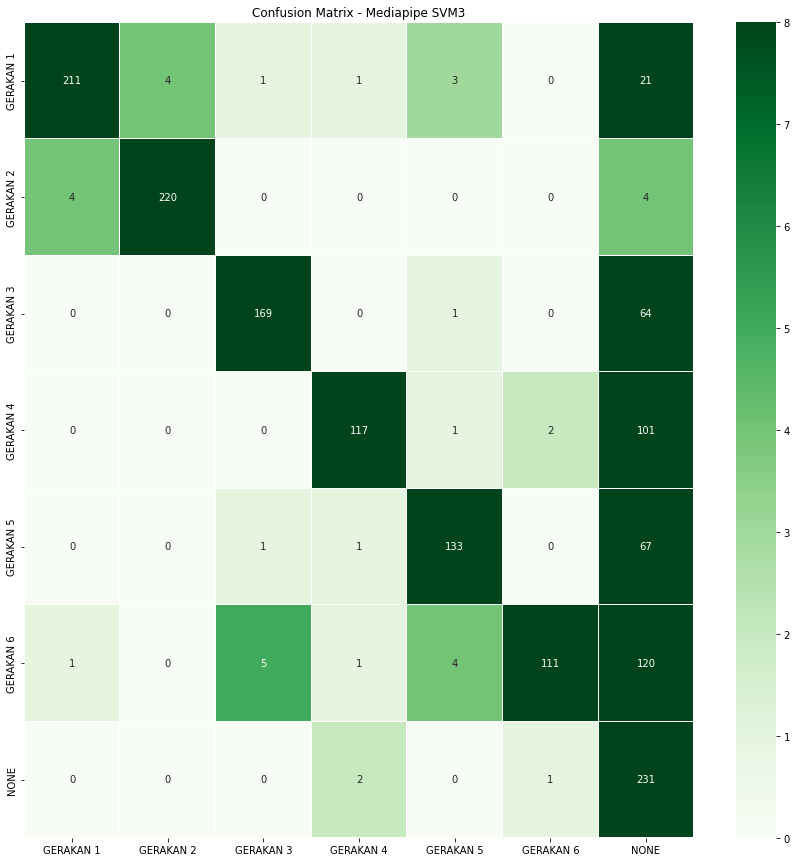

In [13]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_title("Confusion Matrix - Mediapipe SVM3")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Greens, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [14]:
import pickle

# save model
with open('svmsafe.pkl','wb') as f:
    pickle.dump(svm,f)